In [ ]:
!git clone https://github.com/davidADSP/GDL_code.git


Cloning into 'GDL_code'...
remote: Enumerating objects: 394, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 394 (delta 0), reused 1 (delta 0), pack-reused 391 (from 1)
Receiving objects: 100% (394/394), 22.13 MiB | 25.49 MiB/s, done.
Resolving deltas: 100% (237/237), done.


In [ ]:
%cd GDL_code


/content/GDL_code


#Loading the Data

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
trainset_full = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset_full=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 47.7MB/s]


In [ ]:
total_size=len(trainset_full)
train_size=int(0.8*total_size)
val_size=total_size-train_size

In [ ]:
image , label =trainset_full[0]
print(type(image))
print(image.shape)
print(label)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
6


In [ ]:
print(trainset_full[0])

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0

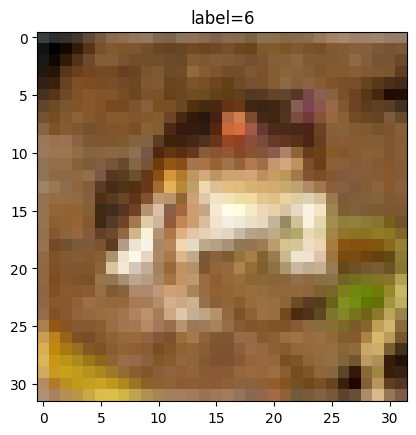

In [ ]:
plt.imshow(image.permute(1,2,0))
plt.title(f"label={label}")
plt.show()

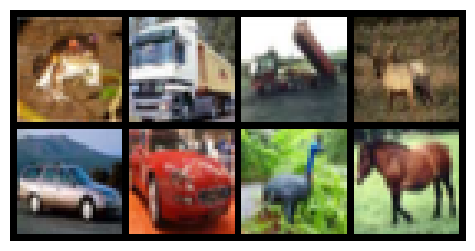

In [ ]:
import torchvision.utils as vutils

# Take first 8 images
images = [trainset_full[i][0] for i in range(8)]
grid = vutils.make_grid(images, nrow=4)

plt.figure(figsize=(6,3))
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()


In [ ]:
indices = torch.randperm(total_size)
train_indices= indices[:train_size]
val_indices= indices[train_size:]

In [ ]:
train_data=torch.utils.data.Subset(trainset_full, train_indices)
val_data=torch.utils.data.Subset(trainset_full, val_indices)

In [ ]:
# creating dataloader

trainloader= torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True)
valloader = torch.utils.data.DataLoader(val_data,batch_size=64,shuffle=False)
testloader = torch.utils.data.DataLoader(testset_full,batch_size=64,shuffle=False)

In [ ]:
# 5️⃣ Example: Access a batch
data_iter = iter(trainloader)
images, labels = next(data_iter)

print("Images shape:", images.shape)   # torch.Size([64, 3, 32, 32])
print("Labels shape:", labels.shape)
print(image,label)

Images shape: torch.Size([64, 3, 32, 32])
Labels shape: torch.Size([64])
tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.

In [ ]:
NUM_CLASSES=10
one_hot_labels=torch.nn.functional.one_hot(labels,num_classes=NUM_CLASSES)
print(f"one hot lable shape{one_hot_labels.shape}")

one hot lable shapetorch.Size([64, 10])


#Building the Model

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

1. Functional API (Custom nn.Module):

This is when you create your own class by inheriting from nn.Module.

You define how data flows manually inside the forward() function.

It’s much more flexible — you can make complex architectures like ResNet, Inception, etc.

In [ ]:
class simplemodel(torch.nn.Module):
  def __init__(self,num_classes):
    super(simplemodel,self).__init__()
    self.flatten=torch.nn.Flatten()
    self.fc1=torch.nn.Linear(32*32*3,128)
    self.fc2=torch.nn.Linear(128,num_classes)

  def forward(self,x):
    x=self.flatten(x)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x

In [ ]:
torch.manual_seed(0)
model = simplemodel(NUM_CLASSES)
print(model)

# Example input
x = torch.randn(4, 3, 32, 32)  # 4 images, 3 channels, 32x32
out = model(x)
print(out)

print(out.shape)  # (4, 10)


simplemodel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
tensor([[ 0.0126, -0.0506, -0.2394,  0.2539,  0.1064,  0.0017, -0.2342, -0.0324,
         -0.0430,  0.0068],
        [-0.4236, -0.0021,  0.1123, -0.1124, -0.1602, -0.1801, -0.1226,  0.0996,
         -0.0473,  0.2464],
        [-0.2823, -0.1080, -0.1697, -0.1730, -0.2195,  0.1586,  0.1997,  0.3924,
         -0.5495,  0.0954],
        [-0.7172, -0.1266,  0.3861,  0.2193, -0.1400, -0.2725, -0.4451,  0.3031,
         -0.4137,  0.4813]], grad_fn=<AddmmBackward0>)
torch.Size([4, 10])


2. Sequential Model

It’s the simplest way to build a neural network in PyTorch.

You just stack layers one after another, like a pipeline — the output of one layer automatically becomes the input of the next layer.

It’s used when the network has a straight flow (no branching, no merging).

In [ ]:
torch.manual_seed(0)
model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32*32*3,128),
    nn.ReLU(),
    nn.Linear(128,NUM_CLASSES)
)

In [ ]:
print(model1)

# Example input
torch.manual_seed(0)
x = torch.randn(4, 3, 32, 32)  # 4 images, 3 channels, 32x32
out = model(x)
print(out)  # 4 images, 3 channels, 32x32
out = model1(x)
print(out)

print(out.shape)  # (4, 10)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)
tensor([[-0.4250, -0.1256, -0.2788,  0.0349, -0.0810, -0.2022, -0.0019,  0.0563,
         -0.5011,  0.1656],
        [-0.3704, -0.2244, -0.2726,  0.0290,  0.0167,  0.1291,  0.1729,  0.0749,
         -0.1413,  0.2492],
        [-0.6329, -0.4834,  0.3846, -0.1513, -0.0455,  0.2027,  0.3164,  0.2878,
         -0.1080,  0.2208],
        [-0.2386,  0.0937, -0.4188, -0.0958,  0.2207,  0.0020, -0.1042,  0.3804,
         -0.2150,  0.1906]], grad_fn=<AddmmBackward0>)
tensor([[-0.4250, -0.1256, -0.2788,  0.0349, -0.0810, -0.2022, -0.0019,  0.0563,
         -0.5011,  0.1656],
        [-0.3704, -0.2244, -0.2726,  0.0290,  0.0167,  0.1291,  0.1729,  0.0749,
         -0.1413,  0.2492],
        [-0.6329, -0.4834,  0.3846, -0.1513, -0.0455,  0.2027,  0.3164,  0.2878,
         -0.1080,  0.2208],
        [-0.2386,  0.0

In [ ]:
torch.manual_seed(0)
x = torch.randn(3)
print(x)


tensor([ 1.5410, -0.2934, -2.1788])


In [ ]:
!pip install torchinfo


In [ ]:
from torchinfo import summary

summary(model, input_size=(1, 3, 32, 32))


Layer (type:depth-idx)                   Output Shape              Param #
simplemodel                              [1, 10]                   --
├─Flatten: 1-1                           [1, 3072]                 --
├─Linear: 1-2                            [1, 128]                  393,344
├─Linear: 1-3                            [1, 10]                   1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.39
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.58
Estimated Total Size (MB): 1.59

# Training model

In [ ]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
"""for batch_idx, (inputs, targets) in enumerate(train_loader):
    print(f"Batch {batch_idx}:")
    print(f"  inputs shape: {inputs.shape}")   # torch.Size([32, 3, 32, 32])
    print(f"  targets shape: {targets.shape}") # torch.Size([32])
    print(f"  targets values: {targets}")"""

'for batch_idx, (inputs, targets) in enumerate(train_loader):\n    print(f"Batch {batch_idx}:")\n    print(f"  inputs shape: {inputs.shape}")   # torch.Size([32, 3, 32, 32])\n    print(f"  targets shape: {targets.shape}") # torch.Size([32])\n    print(f"  targets values: {targets}")'

In [ ]:
def train(model,trainloader,valloader,criterion,optimizer,epochs,device="cuda"):
  model.to(device)
  train_losses=[]
  val_losses=[]
  train_acc=[]
  val_acc=[]
  for epoch in range(epochs):
    model.train()
    running_loss=0.0
    correct=0.0
    total=0.0

    for batch_id , (images,labels) in enumerate(trainloader):
      images=images.to(device)
      labels=labels.to(device)
      #zero gradient
      optimizer.zero_grad()
      # forward pass
      outputs=model(images)
      loss=criterion(outputs,labels)
      #backward pass
      loss.backward()
      optimizer.step()

      #calculating statistics
      running_loss+=loss.item()
      _,predicted=outputs.max(1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()

      #if batch_id % 100 ==0:
       # print(f'epochs:[{epoch+1}/{epochs}],Batch:[{batch_id}/{len(trainloader)}],loss:{loss.item()}')

    # calculating training matrix for the epochs

    train_loss=running_loss/len(trainloader)
    train_accuracies=100*correct/total
    train_losses.append(train_loss)
    train_acc.append(train_accuracies)

    #validatioon phase
    val_loss,val_accu=evaluate(model,valloader,criterion,device)

    val_losses.append(val_loss)
    val_acc.append(val_accu)

    print(f'Epoch [{epoch+1}/{epochs}] Completed:')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_accuracies:.2f}%')
    print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_accu:.2f}%')
    print('-' * 60)

  return {
      "train_losses":train_losses,
      "train_acc":train_acc,
      "val_losses":val_losses,
      "val_acc":val_acc
    }





In [ ]:
def evaluate(model,testloader,criterion=None,device="cuda"):
  model.eval()
  model.to(device)

  running_loss=0.0
  correct=0.0
  total=0.0

  with torch.no_grad():  # Disable gradient computation for evaluation
    for images,labels in testloader:
      images=images.to(device)
      labels=labels.to(device)

      outputs=model(images)

      if criterion is not None:
        loss=criterion(outputs,labels)
        running_loss+=loss.item()

      #calculate accuracy
      _,predicted=outputs.max(1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item() if criterion is not None else 0.0

  accuracy= 100 * correct/total
  loss=running_loss/len(testloader)

  return loss,accuracy

In [ ]:
'''# Example batch of 4 samples
outputs = torch.tensor([[2.1, 0.5, -1.0],  # class 0 has highest value
                        [0.1, 2.5, 0.3],   # class 1 has highest value
                        [-1.0, 1.0, 3.0],  # class 2 has highest value
                        [0.5, 1.5, 0.1]])  # class 1 has highest value

targets = torch.tensor([0, 1, 2, 1])  # Ground truth labels

# Step 1: Get predictions
_, predicted = outputs.max(0)
print(predicted)  # tensor([0, 1, 2, 1])

# Step 2: Compare predictions with targets
comparison = predicted.eq(targets)
print(comparison)  # tensor([True, True, True, True]) - all correct!

# Step 3: Count correct predictions
correct_count = comparison.sum()
print(correct_count)  # tensor(4)  - PyTorch tensor

# Step 4: Extract the number
correct_count_scalar = correct_count.item()
print(correct_count_scalar)  # 4  - Python integer'''

'# Example batch of 4 samples\noutputs = torch.tensor([[2.1, 0.5, -1.0],  # class 0 has highest value\n                        [0.1, 2.5, 0.3],   # class 1 has highest value  \n                        [-1.0, 1.0, 3.0],  # class 2 has highest value\n                        [0.5, 1.5, 0.1]])  # class 1 has highest value\n\ntargets = torch.tensor([0, 1, 2, 1])  # Ground truth labels\n\n# Step 1: Get predictions\n_, predicted = outputs.max(0)\nprint(predicted)  # tensor([0, 1, 2, 1])\n\n# Step 2: Compare predictions with targets\ncomparison = predicted.eq(targets)\nprint(comparison)  # tensor([True, True, True, True]) - all correct!\n\n# Step 3: Count correct predictions\ncorrect_count = comparison.sum()\nprint(correct_count)  # tensor(4)  - PyTorch tensor\n\n# Step 4: Extract the number\ncorrect_count_scalar = correct_count.item()\nprint(correct_count_scalar)  # 4  - Python integer'

In [ ]:
model=simplemodel(NUM_CLASSES)
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# check if GPU is availble
device='cuda' if torch.cuda.is_available() else "cpu"
print(f'using device:{device}')

# train the model
history=train(model,trainloader,valloader,criterion,optimizer,epochs=10,device=device)

#final evaluating on test set

test_loss,test_accuracy=evaluate(model,testloader,criterion,device)
print(f'\nFinal Test Results:')
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

using device:cpu
Epoch [1/10] Completed:
  Train Loss: 1.9083, Train Acc: 31.02%
  Val Loss: 1.7784, Val Acc: 34.91%
------------------------------------------------------------
Epoch [2/10] Completed:
  Train Loss: 1.7401, Train Acc: 38.18%
  Val Loss: 1.6891, Val Acc: 39.86%
------------------------------------------------------------
Epoch [3/10] Completed:
  Train Loss: 1.6778, Train Acc: 40.11%
  Val Loss: 1.6507, Val Acc: 41.79%
------------------------------------------------------------
Epoch [4/10] Completed:
  Train Loss: 1.6310, Train Acc: 42.00%
  Val Loss: 1.6532, Val Acc: 40.75%
------------------------------------------------------------
Epoch [5/10] Completed:
  Train Loss: 1.5963, Train Acc: 43.46%
  Val Loss: 1.6237, Val Acc: 42.01%
------------------------------------------------------------
Epoch [6/10] Completed:
  Train Loss: 1.5668, Train Acc: 44.34%
  Val Loss: 1.5876, Val Acc: 42.76%
------------------------------------------------------------
Epoch [7/10] Comp